__Lab-02-XOR-APUF-Modeling__

Student Names: [Jwala Sri Hari Badam & Ganesh Veluru]

Group Number: [3]

# Setup

Below will import the `modelPUF` modules to setup the CRPs and make a PUF model from the `modelPUF.py` script.

Also, add any other library here that you may need to import.

In [32]:
from modelPUF import *

# PUF Modeling

We will be modeling each of your FPGAs. Go through the `modelPUF.py` script and see how to interface with the model. You need to model it using the resp files from Lab 01, select one (any) for each FPGA.

Since we are going to train and test the model many times, make a function that will setup the CRP, model, train, test, and get it's accuracy for a given dataset percent `p` for training.

__complete this__

In [33]:
import numpy as np
#converting responses to 2-XOR using actual responses.

data_0 = np.load("../Responses/fpga0_resp0_50k.npz")
data_0=list(data_0['response'])

data_1= np.load("../Responses/fpga1_resp0_50k.npz")
data_1=list(data_1['response'])

fpga0_xor_2_puf=[]
fpga1_xor_2_puf=[]

# outer loop to read all responses.
for i in range(len(data_0)):
    xor_str_0=""
    xor_str_1=""
    #inner loop to perform xor operation on consecutive bits.
    for j in range(0,len(data_0[i]),2):
        
        xor_str_0+=str(int(data_0[i][j])^int(data_0[i][j+1]))
        xor_str_1+=str(int(data_1[i][j])^int(data_1[i][j+1]))
        
        
    fpga0_xor_2_puf.append(xor_str_0)
    fpga1_xor_2_puf.append(xor_str_1)
    
#saving the 2-xor responses in the files.
responses_0=np.array(fpga0_xor_2_puf)
out_filename_0 = "../Responses/fpga0_resp0_50k_xor_2_puf.npz"
np.savez(out_filename_0, response=responses_0)

responses_1=np.array(fpga1_xor_2_puf)
out_filename_1 = "../Responses/fpga1_resp0_50k_xor_2_puf.npz"
np.savez(out_filename_1, response=responses_1)

print('Output File =', out_filename_0,out_filename_1)

Output File = ../Responses/fpga0_resp0_50k_xor_2_puf.npz ../Responses/fpga1_resp0_50k_xor_2_puf.npz


In [34]:
import numpy as np
#converting responses to 4-XOR using 2-xor responses.

data_0 = np.load("../Responses/fpga0_resp0_50k_xor_2_puf.npz")
data_0=list(data_0['response'])

data_1= np.load("../Responses/fpga1_resp0_50k_xor_2_puf.npz")
data_1=list(data_1['response'])

fpga0_xor_4_puf=[]
fpga1_xor_4_puf=[]

# outer loop to read all responses.
for i in range(len(data_0)):
    xor_str_0=""
    xor_str_1=""
    #inner loop to perform xor operation on consecutive bits.
    for j in range(0,len(data_0[i]),2):
        
        xor_str_0+=str(int(data_0[i][j])^int(data_0[i][j+1]))
        xor_str_1+=str(int(data_1[i][j])^int(data_1[i][j+1]))
        
        
    fpga0_xor_4_puf.append(xor_str_0)
    fpga1_xor_4_puf.append(xor_str_1)
    
        
responses_0=np.array(fpga0_xor_4_puf)
out_filename_0 = "../Responses/fpga0_resp0_50k_xor_4_puf.npz"
np.savez(out_filename_0, response=responses_0)

responses_1=np.array(fpga1_xor_4_puf)
out_filename_1 = "../Responses/fpga1_resp0_50k_xor_4_puf.npz"
np.savez(out_filename_1, response=responses_1)

print('Output File =', out_filename_0,out_filename_1)

Output File = ../Responses/fpga0_resp0_50k_xor_4_puf.npz ../Responses/fpga1_resp0_50k_xor_4_puf.npz


In [35]:
from modelPUF import *
from tqdm import tnrange
import matplotlib.pyplot as plt

cfile = "../Challenges/challenges_50k.npz"
xor_2_rfile0 = "../Responses/fpga0_resp0_50k_xor_2_puf.npz"
xor_2_rfile1= "../Responses/fpga1_resp0_50k_xor_2_puf.npz"
xor_4_rfile0= "../Responses/fpga0_resp0_50k_xor_4_puf.npz"
xor_4_rfile1= "../Responses/fpga1_resp0_50k_xor_4_puf.npz"

In [36]:
# Method to get Accuracy by Interfacing with modelPUF.py
'''
Function: get_accuracy()
  Input: 'cfile' - challanges file name
  Input: 'rfile' - responses file name
  Input: 'p' - percentage of data to use for training
  Output: 'accuracy' - model accuracy
'''
def get_accuracy(cfile: str, rfile: str, p: float) -> float:
    # Setup CRP dataset format for the PUF model
    crpData = ChallengeResponseSet(cfilename=cfile, rfilename=rfile)

    # Input the CRP dataset to the pufModel
    puf = pufModel(crpData)
    
    # Splits the CRP dataset in train/test subsets. p (float): percentage of data to use for training
    x=crpData.train_test_split(p)

    # Trains the models with the CRP train subset 
    puf.train(crpData)
    
    # Test the models with the CRP test subset and computes its accuracy.
    accuracy = puf.test(crpData)
    return accuracy

Test your function. Note: this may take a while, so test with a small file (such as the 5k).

In [37]:
get_accuracy(cfile, xor_2_rfile0, 0.85)

Accuracy on 7500 unseen challenges is: 0.6838666796684265


0.6838666796684265

Now, lets use this function to generate model the PUFs and generate accuracy results for varying `p` values. Make sure to save the list of accuracies for each FPGA (total of 2 lists if working in pairs).

The implementation this is up to you. Hint: iteration

In [38]:
# calculating accuracies for all split ratios and for 2-xor and 4-xor datasets of FPGA0 and FPGA1
split_ratio= [i / 100.0 for i in range(5, 100, 5)]

print(split_ratio)

xor_2_accuracy_fpga0=[]
xor_2_accuracy_fpga1=[]
xor_4_accuracy_fpga0=[]
xor_4_accuracy_fpga1=[]

for i in split_ratio:
    xor_2_accuracy_fpga0.append(get_accuracy(cfile, xor_2_rfile0, i))
    xor_2_accuracy_fpga1.append(get_accuracy(cfile, xor_2_rfile1, i))
    xor_4_accuracy_fpga0.append(get_accuracy(cfile, xor_4_rfile0, i))
    xor_4_accuracy_fpga1.append(get_accuracy(cfile, xor_4_rfile1, i))
    
    
print(xor_2_accuracy_fpga0)
print(xor_2_accuracy_fpga1)
print(xor_4_accuracy_fpga0)
print(xor_4_accuracy_fpga1)

[0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95]
Accuracy on 47500 unseen challenges is: 0.6778526306152344
Accuracy on 47500 unseen challenges is: 0.674842119216919
Accuracy on 47500 unseen challenges is: 0.5665473937988281
Accuracy on 47500 unseen challenges is: 0.5375158190727234
Accuracy on 45000 unseen challenges is: 0.6992889046669006
Accuracy on 45000 unseen challenges is: 0.6972444653511047
Accuracy on 45000 unseen challenges is: 0.5691778063774109
Accuracy on 45000 unseen challenges is: 0.5481555461883545
Accuracy on 42500 unseen challenges is: 0.6812000274658203
Accuracy on 42500 unseen challenges is: 0.7221646904945374
Accuracy on 42500 unseen challenges is: 0.570870578289032
Accuracy on 42500 unseen challenges is: 0.5596705675125122
Accuracy on 40000 unseen challenges is: 0.7019749879837036
Accuracy on 40000 unseen challenges is: 0.7121250033378601
Accuracy on 40000 unseen challenges is: 0.5650500059127808
Accuracy on

# Statistical Results

Prints the following stats values for each model accuracy list (FPGA0 and FPGA1): min, max, average, and standard deviation (StD). NumPy have functions to compute all these.

Also, print the sample size (n) of the collected data (i.e., the length of each list).

In [68]:
# function to retun summary using pandas Dataframe describe()
import pandas as pd
def summary(np_arr):
    '''
        Input : Numpy array
        output : Summary DataFrame
    '''
    df= pd.DataFrame(np_arr)
    df = df.describe().round(3)
    df = df.loc[['min','max','mean','std']]
    return df

In [73]:
#printing the summary for accuracies calculated for all split ratios.

ANN_accuracy={}
ANN_accuracy['xor_2_acc_fpga0']=xor_2_accuracy_fpga0
ANN_accuracy['xor_2_acc_fpga1']=xor_2_accuracy_fpga1
ANN_accuracy['xor_4_acc_fpga0']=xor_4_accuracy_fpga0
ANN_accuracy['xor_4_acc_fpga1']=xor_4_accuracy_fpga1
          
print('======ANN Accuracies for FPGA0 and FPGA1======')
print()
ANN_accuracy= summary(ANN_accuracy)
print(ANN_accuracy)

======ANN Accuracies for FPGA0 and FPGA1======

      xor_2_acc_fpga0  xor_2_acc_fpga1  xor_4_acc_fpga0  xor_4_acc_fpga1
min             0.664            0.668            0.565            0.538
max             0.730            0.736            0.590            0.589
mean            0.707            0.706            0.578            0.570
std             0.021            0.023            0.008            0.013


# Plots

Plot and save (as PDF) each model accurance list (FPGA0 and FPGA1) as a line graph or vertical bar graph (your choice). Make sure to format the plots with adequate size, title, axis labels, ... (see the Tutorial-01-Python).

To generate line graphs, use `plt.plot()`. Read more: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html

To generate vertical bar graphs, use `plt.bar()`. Read more: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html

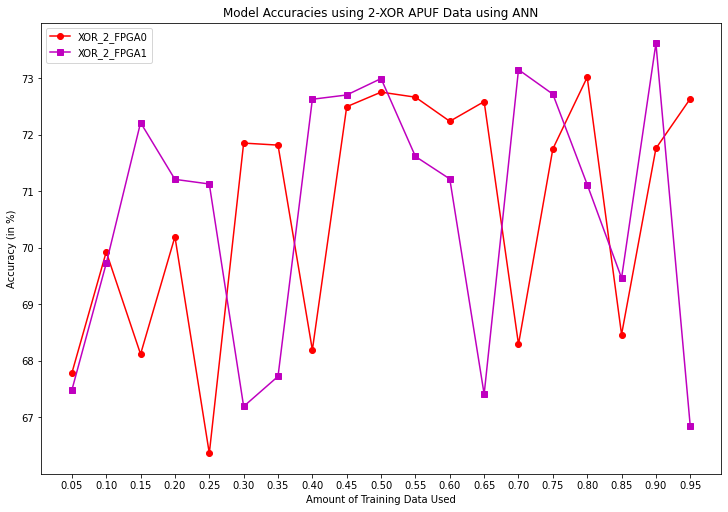

In [78]:
#plot for 2-xor accuracies based on training data.

plt.figure(figsize=(10,7), constrained_layout=True)

# format the plot
plt.title("Model Accuracies using 2-XOR APUF Data using ANN")        # adds title
plt.ylabel("Accuracy (in %)")              # adds x-axis label
plt.xlabel("Amount of Training Data Used") # adds y-axis label


plt.plot(np.array(split_ratio), np.array(xor_2_accuracy_fpga0) * 100,'r',label='XOR_2_FPGA0',marker = 'o')
plt.plot(np.array(split_ratio), np.array(xor_2_accuracy_fpga1) * 100,'m',label='XOR_2_FPGA1',marker = 's')
# plt.xticks(range(len(split_ratio)), split_ratio, size='small')
plt.xticks(np.arange(0.05, 1, 0.05))

# Display the plotit 
plt.legend()
# save the plot
plt.savefig("../Figures/2_xor_fpga.pdf") # PDF recommended
plt.savefig("../Figures/2_xor_fpga.png", dpi=300)

plt.show()



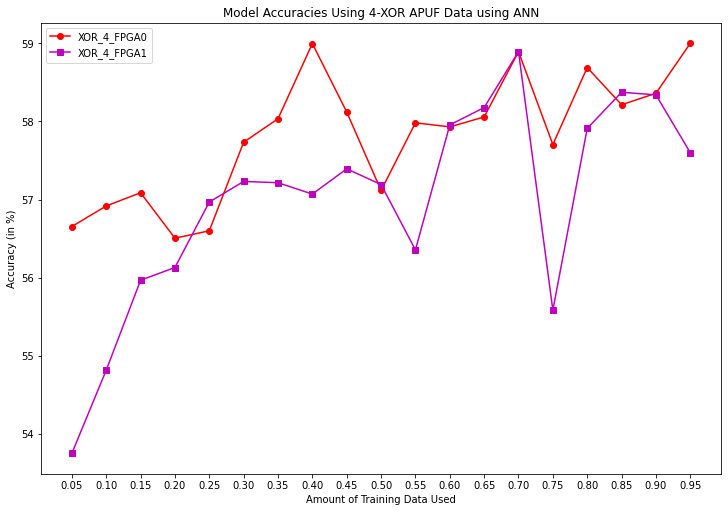

In [79]:
#plot for 2-xor accuracies based on training data.

plt.figure(figsize=(10,7), constrained_layout=True)

# format the plot
plt.title("Model Accuracies Using 4-XOR APUF Data using ANN")        # adds title
plt.ylabel("Accuracy (in %)")              # adds x-axis label
plt.xlabel("Amount of Training Data Used") # adds y-axis label


plt.plot(np.array(split_ratio), np.array(xor_4_accuracy_fpga0) * 100,'r',label='XOR_4_FPGA0',marker = 'o')
plt.plot(np.array(split_ratio), np.array(xor_4_accuracy_fpga1) * 100, 'm',label='XOR_4_FPGA1',marker = 's')
# plt.xticks(range(len(split_ratio)), split_ratio, size='small')
plt.xticks(np.arange(0.05, 1, 0.05))

# Display the plotit 
plt.legend()

# save the plot
plt.savefig("../Figures/4_xor_fpga.pdf") # PDF recommended
plt.savefig("../Figures/4_xor_fpga.png", dpi=300)

plt.show()
